<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)


Инструкция по выполнению проекта  
1.	Загрузите и подготовьте данные. Поясните порядок действий.  
2.	Исследуйте баланс классов, обучите модель без учёта дисбаланса. Кратко опишите выводы.  
3.	Улучшите качество модели, учитывая дисбаланс классов. Обучите разные модели и найдите лучшую. Кратко опишите выводы.  
4.	Проведите финальное тестирование.   
Описание данных  
Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»)  


Признаки  
•	RowNumber — индекс строки в данных  
•	CustomerId — уникальный идентификатор клиента  
•	Surname — фамилия  
•	CreditScore — кредитный рейтинг  
•	Geography — страна проживания  
•	Gender — пол  
•	Age — возраст  
•	Tenure — сколько лет человек является клиентом банка  
•	Balance — баланс на счёте  
•	NumOfProducts — количество продуктов банка, используемых клиентом  
•	HasCrCard — наличие кредитной карты  
•	IsActiveMember — активность клиента  
•	EstimatedSalary — предполагаемая зарплата  
Целевой признак  
•	Exited — факт ухода клиента  

## Подготовка данных

Делим блоки загрузки библиотек и датасета, тогда в случае необходимости добавления новых библиотек не придется загружать весь датасет заново и перезапускать проект целиком.

In [1]:
!pip install scikit-learn==1.1.3


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import warnings
import pandas as pd # импорт библиотеки pandas 
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn
import numpy as np # импорт библиотеки nump
import random # импорт модуля random для генерации случайных чисел
import time 
import re
from scipy import stats as st # импорт библиотеки scipy
from tqdm import tqdm # импорт библиотеки tqdm для просмотра прогресса обучения модели
from sklearn.metrics import accuracy_score # импорт метрики из библиотеки sklearn 
from sklearn.model_selection import train_test_split # импорт разделителя
from sklearn.tree import DecisionTreeClassifier # импорт дерева решений
from sklearn.ensemble import RandomForestClassifier # импорт классификатора случайного леса
from sklearn.linear_model import LogisticRegression # импорт линейной регрессии 
from sklearn.preprocessing import StandardScaler # стандартизация
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve # импорт метрик
from sklearn.utils import shuffle # импорт шаффла для перемешивания
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)
from numpy import array 
from numpy import argmax 



In [3]:
# читаем csv-файл и записываем его в переменную df
df = pd.read_csv('datasets/Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
# смотрим, как выглядит файл, с помощью метода .head()
df.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# используем метод describe() для вычисления статистических данных
df.describe(include='all') 


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Смотрим наличие дубликатов

In [6]:
df.duplicated().sum()

0

Вывод по нашим данным:  
Dtype пока менять не будем. Для красоты датафрейма преобразуем названия столбцов в верблюжий регистр. 
Имеются пропуски в столбце  Tenure. Tenure — это столбец, который показывает сколько лет человек является клиентом банка. У нас есть несколько разумных решений, как поступить: мы можем заполнить данные медианным значением и можем их удалить совсем, т.к. колличество пропусков меньше 10%. Дам себе немного времени на размышления. 
Столбец RowNumber дублирует номера строк, его можно удалить. Столбцы CustomerId и Surname роли в исследовании не играют, также можно удалить. 

Обработаем данные:

Изменим название колонок - отформатируем в стандартный формат:

Чтобы не название колонок вручную, можно использовать регулярные выражения.

In [7]:
# удаляем столбцы 'surname', 'row_number', 'customer_id' методом drop()
df = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

In [8]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [10]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Оценим баланс выборки 

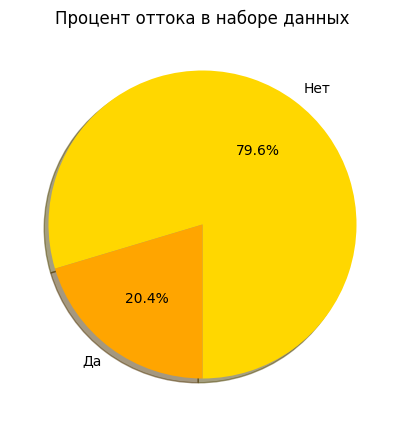

In [11]:
sizes = df['exited'].value_counts(sort = True)
colors = ["gold","orange"] 
plt.rcParams['figure.figsize'] = 5,5 # Plot
plt.pie(sizes, explode=None, labels=['Нет','Да'], colors=colors,autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Процент оттока в наборе данных')
plt.show()

Выборка несбалансирована, примерно 20% клиентов уходят из банка.
На первый взгляд это может показаться проблемой дисбаланса, но на самом деле, никакой проблемы нет! Дисбаланс – это естественное свойство данных. Когда говорят, что в этом случае использование точности неправильно, т.к. формально высокая точность получается у константного решения, то это проблема выбора функционала качества при дисбалансе, а не самого дисбаланса. 

In [12]:
df_filled = df
df_filled['tenure'] = df_filled['tenure'].fillna(df_filled['tenure'].median())

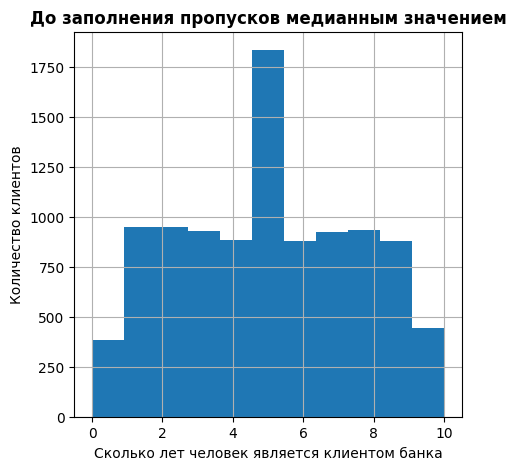

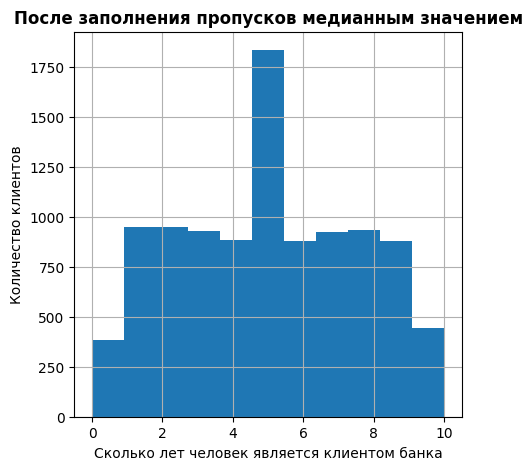

In [13]:
df_filled['tenure'].hist(bins=11)
plt.title('До заполнения пропусков медианным значением', weight = 'bold', size = 12)
plt.xlabel('Cколько лет человек является клиентом банка')
plt.ylabel('Количество клиентов')
plt.show()
df['tenure'].hist(bins=11)
plt.title('После заполнения пропусков медианным значением', weight = 'bold', size = 12)
plt.xlabel('Cколько лет человек является клиентом банка')
plt.ylabel('Количество клиентов')
plt.show()



In [14]:
# заменим датасет на новый
df = df_filled

Прежде, чем обучать модель, подготовим данные для обработки:  

Некоторые из фичей в нашем датасете являются категориальными, то есть принимают значения из (обычно конечного числа) значений, не являющихся числами. Например, пол, наличие кредитной карты, географические признаки и так далее. Как правило, с такими значениями невозможно производить арифметические операции или же результаты их применения не имеют смысла.
Самый простой способ – использовать one-hot кодирование (one-hot encoding). Иными словами, вместо ячейки со значением  объекта появляется строка нулей и единиц.   

Применим стандартизацию и OHE, чтобы применить несколько моделей машинного обучения (и не создавать множество датасетов).


Что касается разделения данных, то у нас есть два варианта развития событий. Первый - создать двухкомпонентный датасет, где разбиение на две части, на тренировочные данные и тестовые данные. Это уместно в том случае, когда тестовая выборка спрятана. В такой момент рекомендуется 75% данных отвести под обучающую, а 25% — под валидационную. Соотношение 3:1.  

Второй путь - это  создать трехкомпонентный датасет, где тренировочные, валидационные и тестовые данные.   
На тренировочной части модель учится видеть, на тестовой проверяет качество. Когда модель пытается улучшится, то подыскивает оптимальное значение гиперпараметров. В этом случае есть вероятность переобучения (модель слишком подробно учитывает особенности, из-за чего становится малоэффективна).

Чтобы избежать переобучения, мы можем создать валидационную выборку и проверять все этапы на ней.

Разобъем данные на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные рекомендуется разбить в соотношении 3:1:1.

Выведем нужные нам столбцы и и присвоим их к новым переменным:

In [16]:
features = df.drop('exited', axis=1)
target = df['exited']

In [17]:
# воспользуемся train_test_split с стратификацией по target

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                target,
                                                                test_size=0.2,
                                                                random_state=12345, 
                                                                stratify=target)

In [18]:
# воспользуемся train_test_split с стратификацией по target

features_train, features_valid, target_train, target_valid = train_test_split(features_train,
                                                                target_train,
                                                                test_size=0.25,
                                                                random_state=12345, 
                                                                stratify=target_train)

StandardScaler – это важный метод, который в основном выполняется как этап предварительной обработки перед многими моделями машинного обучения, чтобы стандартизировать диапазон функциональных возможностей входного набора данных. Cтандартизируем признаки с помощью StandardScaler.


In [22]:
#Проведем кодирование с помощью OHE
df = pd.get_dummies(df, drop_first=True)
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

In [23]:
scaler = StandardScaler()
numeric = ['credit_score', 'age', 'balance', 'estimated_salary']
scaler.fit(features_train[numeric])# < напишите код здесь >
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.head())


      credit_score       age  tenure   balance  num_of_products  has_cr_card  \
5536     -0.143332  0.577533     5.0 -1.220573                2            1   
8530      1.632702 -0.564119     2.0  0.435807                1            1   
1762      1.116413 -0.468981     1.0  1.245822                1            1   
9090      1.643028  0.006707     5.0 -1.220573                1            1   
8777     -0.484083 -1.420358     1.0  1.421989                2            1   

      is_active_member  estimated_salary  geography_Germany  geography_Spain  \
5536                 1          1.029613              False             True   
8530                 0          0.237986              False            False   
1762                 1         -0.686104              False            False   
9090                 0         -0.391097              False            False   
8777                 0         -1.361559              False             True   

      gender_Male  
5536         True 

Выведем размеры выборок для проверки, посмотрим, все ли прошло успешно.

In [24]:
print('Размер тренировочной выборки', target_train.shape[0])
print('Размер валидационной выборки', target_valid.shape[0])
print('Размер тестовой выборки', target_test.shape[0])

Размер тренировочной выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000


In [25]:
# код ревьюера
features_train

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
5536,-0.143332,0.577533,5.0,-1.220573,2,1,1,1.029613,False,True,True
8530,1.632702,-0.564119,2.0,0.435807,1,1,0,0.237986,False,False,False
1762,1.116413,-0.468981,1.0,1.245822,1,1,1,-0.686104,False,False,False
9090,1.643028,0.006707,5.0,-1.220573,1,1,0,-0.391097,False,False,False
8777,-0.484083,-1.420358,1.0,1.421989,2,1,0,-1.361559,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2956,1.467489,-0.849532,8.0,-1.220573,2,1,0,1.727827,False,False,True
667,-1.516661,-0.944670,3.0,-1.220573,2,1,1,0.760116,False,False,True
7371,2.066384,-0.849532,10.0,1.243157,2,1,0,-0.649923,False,False,True
9472,1.291951,3.336526,0.0,1.361543,1,1,1,0.602245,True,False,False


Датасет состоит из 10000 строк, часть пропущенных значений заполнена.

Выборка несбалансирована, примерно 20% клиентов уходят из банка.

Данные предобратоны, заполнены пропущенные значения и произведена стандартизация данных.   
Приступим к исследованию моделей машинного обучения 🚀
    <br />
    </font>

</div>

## Исследование задачи

Для машинного обучения на тренировочной выборке воспользуемся ранее изученными способами классификации:  

Дерево решений  
Случайный лес  
Линейная регрессия  

И так же подберём гиперпараметры на валидацонной выборке.  


Рассмотрим первую модель — решающее дерево. Оно может описывать процесс принятия решения почти в любой ситуации. На основе значений признаков формулируются ответы, а затем выстраивается дерево с ответами «Да»/«Нет» и различными вариантами действий:

Сразу проведем исследование при разном значении max_depth:

In [26]:
for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.514792899408284
Max depth 3 F1-score 0.375
Max depth 4 F1-score 0.5168539325842697
Max depth 5 F1-score 0.46045694200351495
Max depth 6 F1-score 0.5358851674641149
Max depth 7 F1-score 0.5482866043613708
Max depth 8 F1-score 0.5796269727403156
Max depth 9 F1-score 0.5750350631136044
Max depth 10 F1-score 0.5308464849354376
Max depth 11 F1-score 0.5572005383580081
Max depth 12 F1-score 0.5335051546391754
Max depth 13 F1-score 0.5084306095979247
Max depth 14 F1-score 0.5152284263959391
Max depth 15 F1-score 0.5099502487562189
Max depth 16 F1-score 0.5037037037037037
Max depth 17 F1-score 0.5043263288009889
Max depth 18 F1-score 0.4993997599039616
Max depth 19 F1-score 0.4939467312348669
Max depth 20 F1-score 0.5006016847172081
Max depth 21 F1-score 0.4934131736526946
Max depth 22 F1-score 0.49582836710369493
Max depth 23 F1-score 0.5
Max depth 24 F1-score 0.4982206405693951
Max depth 25 F1-score 0.4982206405693951
Max depth 26 F1-score 0.4982206405693951
Max depth 

Лучший показатель при глубине равной 8
    

Один из алгоритмов классификации — случайный лес (random forest). Алгоритм обучает большое количество независимых друг от друга деревьев, а потом принимает решение на основе голосования.

Проведем исследование на разное количество деревьев.

In [28]:
# запустим цикл с перебором количества деревьев от 10 до 50 с шагом 10
table_forest = pd.DataFrame({'n_estimators':[], 'max_depth':[], 'f1':[]})
for est in tqdm(range(10, 151, 10)):
    # и глубины дерева от 1 до 10
    for depth in range (1, 16):
        row = []
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        row.extend([est, depth, f1])
        table_forest.loc[len(table_forest.index)] = row

100%|█████████████████████████████████████████████████████████████| 15/15 [00:49<00:00,  3.28s/it]


In [29]:
# выдергиваем максимальное значение из таблицы best_forest
best_forest = table_forest[table_forest['f1'] == table_forest['f1'].max()]
best_forest['model'] = 'random forest'
best_forest

,n_estimators,max_depth,f1,model
163,110.0,14.0,0.575428,random forest


Лучший результат estimators - 110, max_depth - 14

Ещё один алгоритм машинного обучения — логистическая регрессия.

Если название и «мимикрирует» под задачу регрессии, всё-таки это алгоритм классификации. Логистическая регрессия:

Сначала считает, к какому классу близок объект
В зависимости от ответа выбирает нужный класс: если результат вычисления положительный, то — «1»; отрицательный — «0».
В логистической регрессии параметров мало. Что-либо вызубрить по признакам в формуле не выйдет, поэтому и вероятность переобучения невелика.


In [30]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_model = f1_score(target_valid, predicted_valid)
print("F1:", f1_model)

F1: 0.3214953271028037


Проведем оценку accuracy, precision и recall, также покажем F-метрику у Решающего дерева  


Следом роведем построение ROC-кривой для Решающего дерева. И выведем показатель AUC-ROC.  

In [31]:

model = DecisionTreeClassifier(random_state=12345, max_depth=8)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Решающее дерево
Точность попадания по классам 0.8535
Precision 0.696551724137931
Recall 0.4963144963144963
F1 0.5796269727403156



AUC-ROC DecisionTreeClassifier 0.8073967650238837


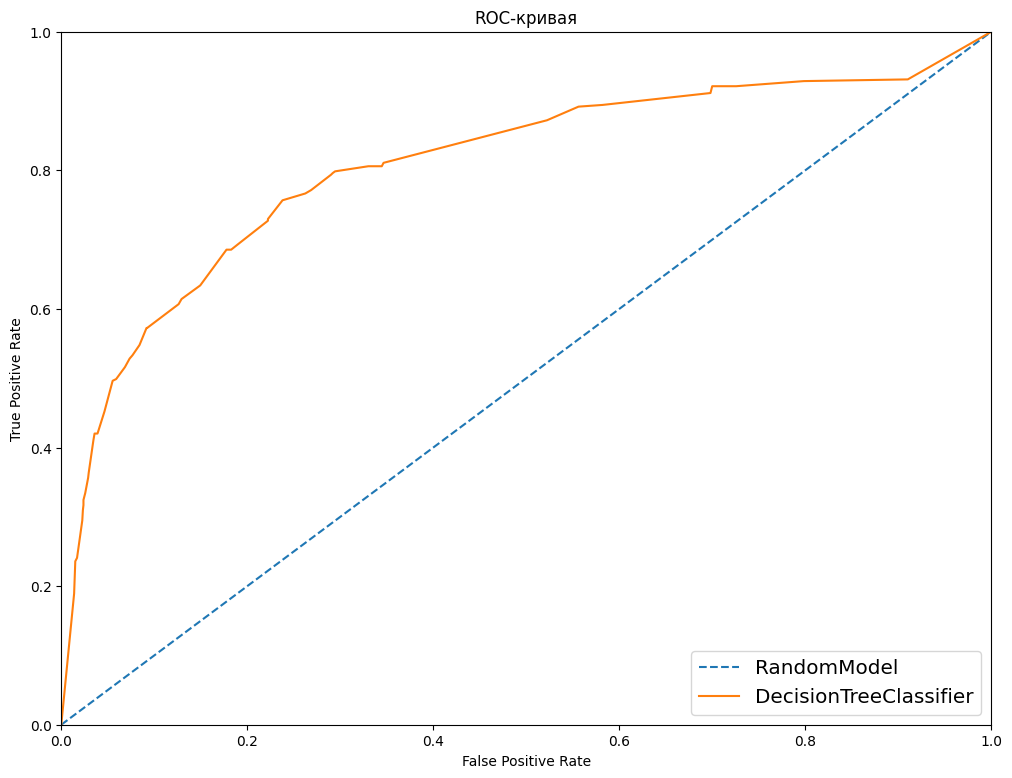

In [32]:
plt.figure(figsize=[12,9])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
model = DecisionTreeClassifier(random_state=12345, max_depth=8)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-кривая")
plt.show()

Проведем оценку accuracy, precision и recall, также покажем F-метрику у Случайного леса 


Следом роведем построение ROC-кривой для Случайного леса. И выведем показатель AUC-ROC. 

In [33]:
model = RandomForestClassifier(random_state=12345, n_estimators=110, max_depth=14)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

Случайный лес
Точность попадания по классам 0.8635
Precision 0.7838983050847458
Recall 0.45454545454545453
F1 0.5754276827371696



AUC-ROC RandomForestClassifier 0.8595089696784612


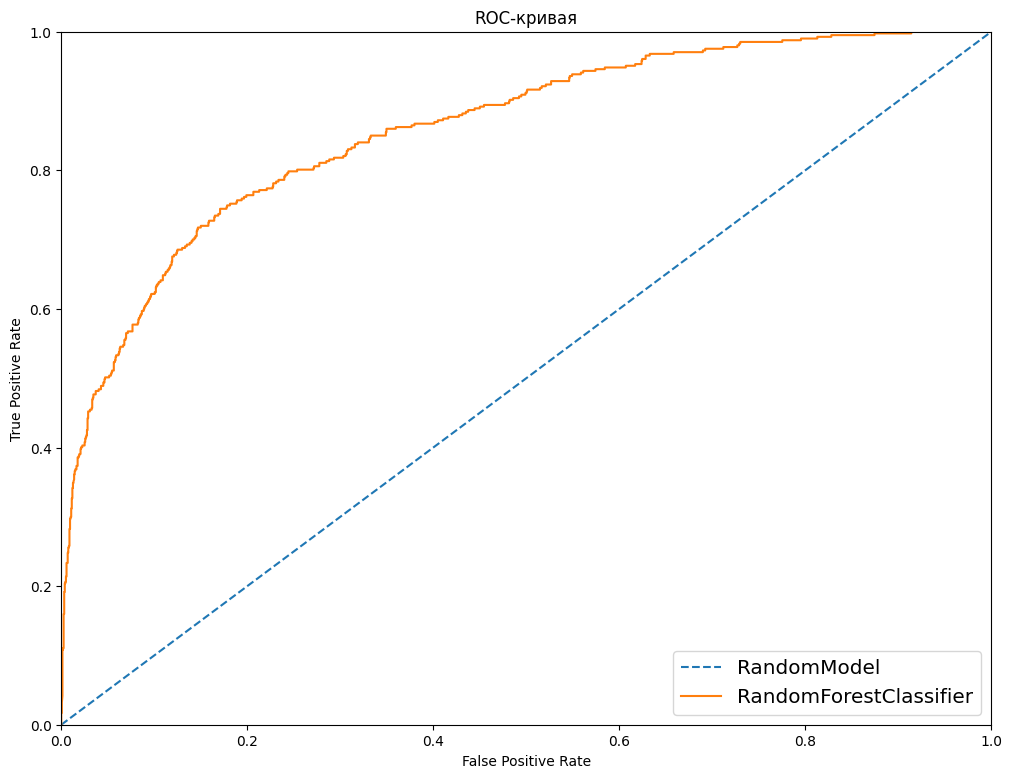

In [34]:
plt.figure(figsize=[12,9])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
model = RandomForestClassifier(random_state=12345,  n_estimators=110, max_depth=14)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-кривая")
plt.show()

Проведем оценку accuracy, precision и recall, также покажем F-метрику у Логистическая регрессия 


Следом проведем построение ROC-кривой для Логистическая регрессия. И выведем показатель AUC-ROC. 

In [35]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


Логистическая регрессия
Точность попадания по классам 0.8185
Precision 0.671875
Recall 0.2113022113022113
F1 0.3214953271028037



AUC-ROC LogisticRegression 0.7875996181080926


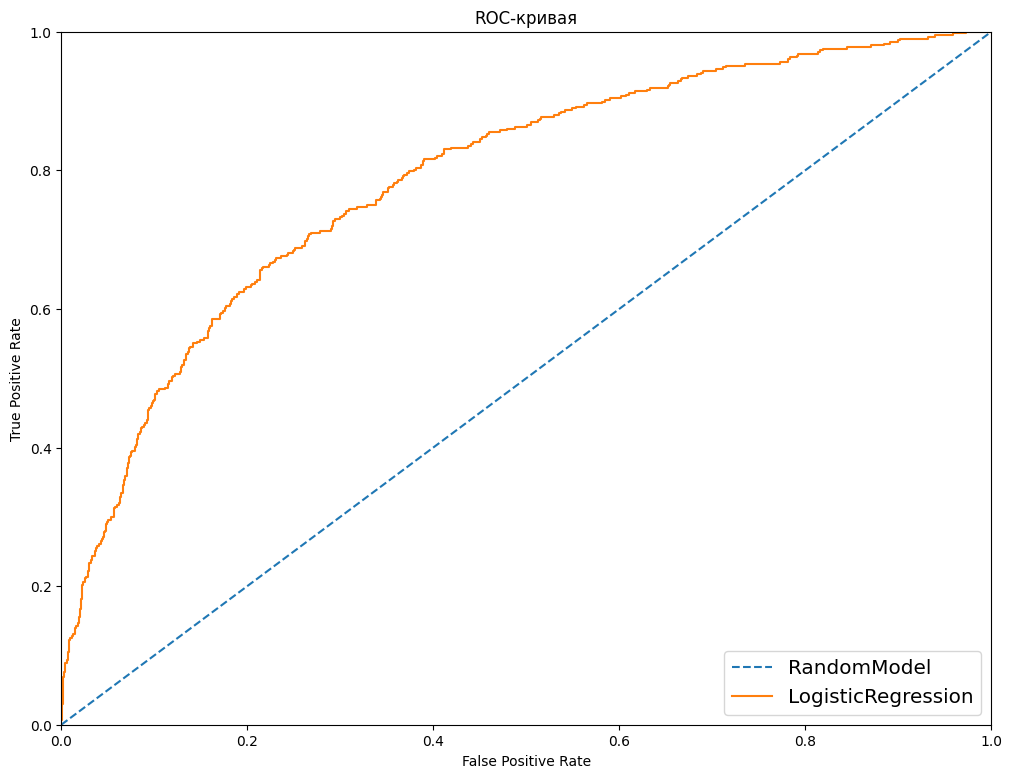

In [36]:
plt.figure(figsize=[12,9])
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')



plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

Вывод:  

В ходе проведенного исследования можно заменить, что метрика F1 и AUC-ROC лучшая на Случаном лесе.

## Борьба с дисбалансом

Придадим объектам редкого класса больший вес.
Например, вы готовитесь к экзаменам и проходите тест. За решение одного вида задач вы получите один балл, другого — два. Чтобы получить более высокую оценку, вы сосредоточились только на «двухбалльных» задачах. Так и модели проще запоминать объекты бóльшей значимости.
Алгоритмы машинного обучения считают все объекты обучающей выборки равнозначными по умолчанию. Если важно указать, что какие-то объекты важнее, их классу присваивается вес (англ. class_weight, «вес класса»).
В алгоритме логистической регрессии в библиотеке sklearn есть аргумент class_weight. По умолчанию он равен None, т. е. классы равнозначны:
вес класса «0» = 1.0
вес класса «1» = 1.0
Если указать class_weight='balanced' (англ. «сбалансированный»), алгоритм посчитает, во сколько раз класс «0» встречается чаще класса «1». 

In [37]:
for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.5074135090609556
Max depth 3 F1-score 0.5336538461538461
Max depth 4 F1-score 0.5422594142259414
Max depth 5 F1-score 0.5606190885640585
Max depth 6 F1-score 0.5747330960854092
Max depth 7 F1-score 0.5691056910569106
Max depth 8 F1-score 0.5548504079782411
Max depth 9 F1-score 0.5293005671077505
Max depth 10 F1-score 0.5255052935514919
Max depth 11 F1-score 0.5291113381001021
Max depth 12 F1-score 0.5289778714436248
Max depth 13 F1-score 0.5157657657657658
Max depth 14 F1-score 0.4835414301929626
Max depth 15 F1-score 0.48072562358276644
Max depth 16 F1-score 0.5040650406504065
Max depth 17 F1-score 0.47697756788665885
Max depth 18 F1-score 0.48727272727272725
Max depth 19 F1-score 0.4945188794153471
Max depth 20 F1-score 0.48894348894348894
Max depth 21 F1-score 0.48477466504263095
Max depth 22 F1-score 0.4969400244798041
Max depth 23 F1-score 0.49570552147239266
Max depth 24 F1-score 0.49570552147239266
Max depth 25 F1-score 0.49570552147239266
Max depth 26 F1-

Лучший показатель при Max depth равном 6

In [38]:
# запустим цикл с перебором количества деревьев от 10 до 50 с шагом 10
table_forest = pd.DataFrame({'n_estimators':[], 'max_depth':[], 'f1':[]})
for est in tqdm(range(10, 151, 10)):
    # и глубины дерева от 1 до 10
    for depth in range (1, 16):
        row = []
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        row.extend([est, depth, f1])
        table_forest.loc[len(table_forest.index)] = row

100%|█████████████████████████████████████████████████████████████| 15/15 [00:49<00:00,  3.27s/it]


In [39]:
# выдергиваем максимальное значение из таблицы best_forest
best_forest = table_forest[table_forest['f1'] == table_forest['f1'].max()]
best_forest['model'] = 'random forest'
best_forest

,n_estimators,max_depth,f1,model
189,130.0,10.0,0.644068,random forest


Лучший показатель при estimators равном 130 и max_depth равным 10

In [40]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_model = f1_score(target_valid, predicted_valid)
print("F1:", f1_model)

F1: 0.5113043478260869


Показатель F1 увеличился, но не достиг необходимого результата.


In [41]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=130,  max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()


AUC-ROC DecisionTreeClassifier 0.8353337929609115
Решающее дерево
Точность попадания по классам 0.761
Precision 0.4504881450488145
Recall 0.7936117936117936
F1 0.5747330960854092

AUC-ROC RandomForestClassifier 0.8692066488676657
Случайный лес
Точность попадания по классам 0.853
Precision 0.6348448687350835
Recall 0.6535626535626535
F1 0.6440677966101696

AUC-ROC LogisticRegression 0.7918149274081477
Логистическая регрессия
Точность попадания по классам 0.719
Precision 0.39569313593539707
Recall 0.7223587223587223
F1 0.5113043478260869



Определенно видны сдвиги в лучшую сторону, особенно у модели Случайного леса, т.к. показатель F1 вырос до значения 0.64

Как сделать объекты частого класса не такими частыми? Вместо повторения важных вопросов убрать часть неважных. Это можно сделать техникой downsampling (от англ. down — «вниз»; sampling — «выборка»).  
Преобразование проходит в несколько этапов:  
•	Разделить обучающую выборку на отрицательные и положительные объекты;  
•	Случайным образом отбросить часть из отрицательных объектов;   
•	С учётом полученных данных создать новую обучающую выборку;  
•	Перемешать данные. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться.  
Чтобы выбросить из таблицы случайные элементы, примените функцию sample(). На вход она принимает аргумент frac (от англ. fraction, «доля»). Возвращает случайные элементы в таком количестве, чтобы их доля от исходной таблицы была равна frac.  


In [42]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled



Уменьшаем выборку в 4 раза, так как 20% клиентов уходят из банка (чтобы значения были приблизительно равны):

In [43]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(target_downsampled.value_counts())

exited
1    1223
0    1194
Name: count, dtype: int64


In [44]:
for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.4860681114551083
Max depth 3 F1-score 0.5159817351598174
Max depth 4 F1-score 0.5228548516439455
Max depth 5 F1-score 0.5551894563426688
Max depth 6 F1-score 0.5933400605449041
Max depth 7 F1-score 0.548611111111111
Max depth 8 F1-score 0.5476864966949953
Max depth 9 F1-score 0.5050505050505051
Max depth 10 F1-score 0.5160142348754447
Max depth 11 F1-score 0.5097345132743362
Max depth 12 F1-score 0.5091543156059285
Max depth 13 F1-score 0.49651567944250874
Max depth 14 F1-score 0.5008726003490401
Max depth 15 F1-score 0.4960971379011276
Max depth 16 F1-score 0.4867180805484147
Max depth 17 F1-score 0.4871794871794871
Max depth 18 F1-score 0.4868977176669484
Max depth 19 F1-score 0.4991482112436116
Max depth 20 F1-score 0.5
Max depth 21 F1-score 0.5
Max depth 22 F1-score 0.5
Max depth 23 F1-score 0.5
Max depth 24 F1-score 0.5
Max depth 25 F1-score 0.5
Max depth 26 F1-score 0.5
Max depth 27 F1-score 0.5
Max depth 28 F1-score 0.5
Max depth 29 F1-score 0.5


Лучший показатель при Max depth равном 6

In [45]:
# запустим цикл с перебором количества деревьев от 10 до 50 с шагом 10
table_forest = pd.DataFrame({'n_estimators':[], 'max_depth':[], 'f1':[]})
for est in tqdm(range(10, 151, 10)):
    # и глубины дерева от 1 до 10
    for depth in range (1, 16):
        row = []
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        row.extend([est, depth, f1])
        table_forest.loc[len(table_forest.index)] = row

100%|█████████████████████████████████████████████████████████████| 15/15 [00:25<00:00,  1.68s/it]


In [46]:
# выдергиваем максимальное значение из таблицы best_forest
best_forest = table_forest[table_forest['f1'] == table_forest['f1'].max()]
best_forest['model'] = 'random forest'
best_forest

,n_estimators,max_depth,f1,model
187,130.0,8.0,0.619883,random forest


In [47]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_model = f1_score(target_valid, predicted_valid)
print("F1:", f1_model)

F1: 0.5047210300429185


Проведем оценку accuracy, precision и recall, также покажем F-метрику у Логистическая регрессия 

Выведем показатель AUC-ROC. 

In [48]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=130, max_depth=8)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()



AUC-ROC DecisionTreeClassifier 0.8435207164020724
Решающее дерево
Точность попадания по классам 0.7985
Precision 0.5034246575342466
Recall 0.7223587223587223
F1 0.5933400605449041

AUC-ROC RandomForestClassifier 0.8754285872929941
Случайный лес
Точность попадания по классам 0.805
Precision 0.5137318255250404
Recall 0.7813267813267813
F1 0.6198830409356725

AUC-ROC LogisticRegression 0.7912720116109946
Логистическая регрессия
Точность попадания по классам 0.7115
Precision 0.38786279683377306
Recall 0.7223587223587223
F1 0.5047210300429185



Есть эфект, но его результат не превысил class_weight='balanced' в значении F1, однако AUC-ROC Случайного леса 0.87, самый высокий из тех, что был

Помогло!  Метрика F1 в модели Случайный лес увеличилась

Как сделать объекты редкого класса не такими редкими в данных?  
Теперь в тесте за решение любой задачи вы получаете 1 балл. Самые важные задачи повторяются по несколько раз, чтобы их легче запомнить.   
Когда обучают модели, такая техника называется upsampling (от англ. up, «вверх»; sampling, «выборка»).  
Преобразование проходит в несколько этапов:  
•	Разделить обучающую выборку на отрицательные и положительные объекты;  
•	Скопировать несколько раз положительные объекты;  
•	С учётом полученных данных создать новую обучающую выборку;  
•	Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.  
Скопировать объекты несколько раз поможет синтаксис умножения списков в Python. Чтобы повторить элементы списка, он умножается на число (нужное количество раз): 

In [49]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(target_upsampled.value_counts())

exited
1    4892
0    4777
Name: count, dtype: int64


In [50]:
for depth in range(2, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    print('Max depth', depth,'F1-score', f1_score(target_valid, predicted_valid))

Max depth 2 F1-score 0.5074135090609556
Max depth 3 F1-score 0.5074135090609556
Max depth 4 F1-score 0.5422594142259414
Max depth 5 F1-score 0.5618556701030928
Max depth 6 F1-score 0.576544315129812
Max depth 7 F1-score 0.5701357466063348
Max depth 8 F1-score 0.5400921658986175
Max depth 9 F1-score 0.5333333333333332
Max depth 10 F1-score 0.5224171539961013
Max depth 11 F1-score 0.5301944728761516
Max depth 12 F1-score 0.5168067226890756
Max depth 13 F1-score 0.5095828635851184
Max depth 14 F1-score 0.5011235955056179
Max depth 15 F1-score 0.4977477477477477
Max depth 16 F1-score 0.4912689173457509
Max depth 17 F1-score 0.4866123399301513
Max depth 18 F1-score 0.49699879951980797
Max depth 19 F1-score 0.4792176039119804
Max depth 20 F1-score 0.49156626506024104
Max depth 21 F1-score 0.4933494558645708
Max depth 22 F1-score 0.48275862068965514
Max depth 23 F1-score 0.5
Max depth 24 F1-score 0.5
Max depth 25 F1-score 0.5
Max depth 26 F1-score 0.5
Max depth 27 F1-score 0.5
Max depth 28 F1

In [51]:
# запустим цикл с перебором количества деревьев от 10 до 50 с шагом 10
table_forest = pd.DataFrame({'n_estimators':[], 'max_depth':[], 'f1':[]})
for est in tqdm(range(10, 151, 10)):
    # и глубины дерева от 1 до 10
    for depth in range (1, 16):
        row = []
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        row.extend([est, depth, f1])
        table_forest.loc[len(table_forest.index)] = row

100%|█████████████████████████████████████████████████████████████| 15/15 [01:11<00:00,  4.79s/it]


In [52]:
# выдергиваем максимальное значение из таблицы best_forest
best_forest = table_forest[table_forest['f1'] == table_forest['f1'].max()]
best_forest['model'] = 'random forest'
best_forest

,n_estimators,max_depth,f1,model
204,140.0,10.0,0.64086,random forest


In [53]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_model = f1_score(target_valid, predicted_valid)
print("F1:", f1_model)

F1: 0.5077186963979418


Проведем оценку accuracy, precision и recall, также покажем F-метрику у Логистическая регрессия 

Выведем показатель AUC-ROC. 

In [54]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier',auc_roc)
print('Решающее дерево')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = RandomForestClassifier(random_state=12345, n_estimators=140, max_depth=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier',auc_roc)
print('Случайный лес')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression',auc_roc)
print('Логистическая регрессия')
print('Точность попадания по классам', accuracy_score(target_valid, predicted_valid))
print('Precision', precision_score(target_valid, predicted_valid))
print('Recall', recall_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))
print()



AUC-ROC DecisionTreeClassifier 0.8364173109935821
Решающее дерево
Точность попадания по классам 0.7635
Precision 0.4535211267605634
Recall 0.7911547911547911
F1 0.576544315129812

AUC-ROC RandomForestClassifier 0.8651101023982379
Случайный лес
Точность попадания по классам 0.833
Precision 0.5697896749521989
Recall 0.7321867321867321
F1 0.6408602150537634

AUC-ROC LogisticRegression 0.7918812495083681
Логистическая регрессия
Точность попадания по классам 0.713
Precision 0.38998682476943347
Recall 0.7272727272727273
F1 0.5077186963979418



Лучшей моделью по F1 стал случайный лес с тренировочными данными.

## Тестирование модели

К моменту тестирования нам удалось на 2ух из 4х моделей достичь необходимой F-меры на тестовых данных: модель случайного леса со взвешенными весами классов и модель с увеличенным количеством класса.  

Модель Случайного леса со взвешенными весами классов:  
AUC-ROC RandomForestClassifier 0.8651101023982379   
Точность попадания по классам 0.833  
Precision 0.5697896749521989  
Recall 0.7321867321867321  
F1 0.6408602150537634  

Модель Случайного леса с увеличенным количеством класса:  
AUC-ROC RandomForestClassifier 0.8692066488676657   
Точность попадания по классам 0.853  
Precision 0.6348448687350835  
Recall 0.6535626535626535  
F1 0.6440677966101696  


In [55]:
# стандартизируем данные

#features_test[numeric] = scaler.transform(features_test[numeric])

In [56]:
# код ревьюера
display(features_upsampled.head(2))
display(features_test.head(2))

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9524,2.066384,-0.08843,5.0,1.127690,1,1,0,-0.381316,True,False,True
5586,1.715308,-1.32522,2.0,1.185273,2,1,1,-1.119800,True,False,False


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7837,2.066384,0.862946,2.0,-1.220573,1,1,0,1.202714,False,True,True
9505,0.011555,-1.039807,10.0,0.052520,1,1,1,-0.443548,False,False,True


В результате исследования была получена модель с лучшими показателями как по F1-мере, так и по AUC-ROC - Случайный лес: взвешенные классы, протестируем же её скорее!🤓

In [57]:

model = RandomForestClassifier(random_state=12345, n_estimators=130,  max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Случайный лес - взвешенные классы')
print('Точность попадания по классам', accuracy_score(target_test, predicted_test))
print('Precision', precision_score(target_test, predicted_test))
print('Recall', recall_score(target_test, predicted_test))
print('F1', f1_score(target_test, predicted_test))
print()

Случайный лес - взвешенные классы
Точность попадания по классам 0.8475
Precision 0.6208530805687204
Recall 0.6437346437346437
F1 0.632086851628468



AUC-ROC RandomForestClassifier - disbalanced 0.8658165098843066


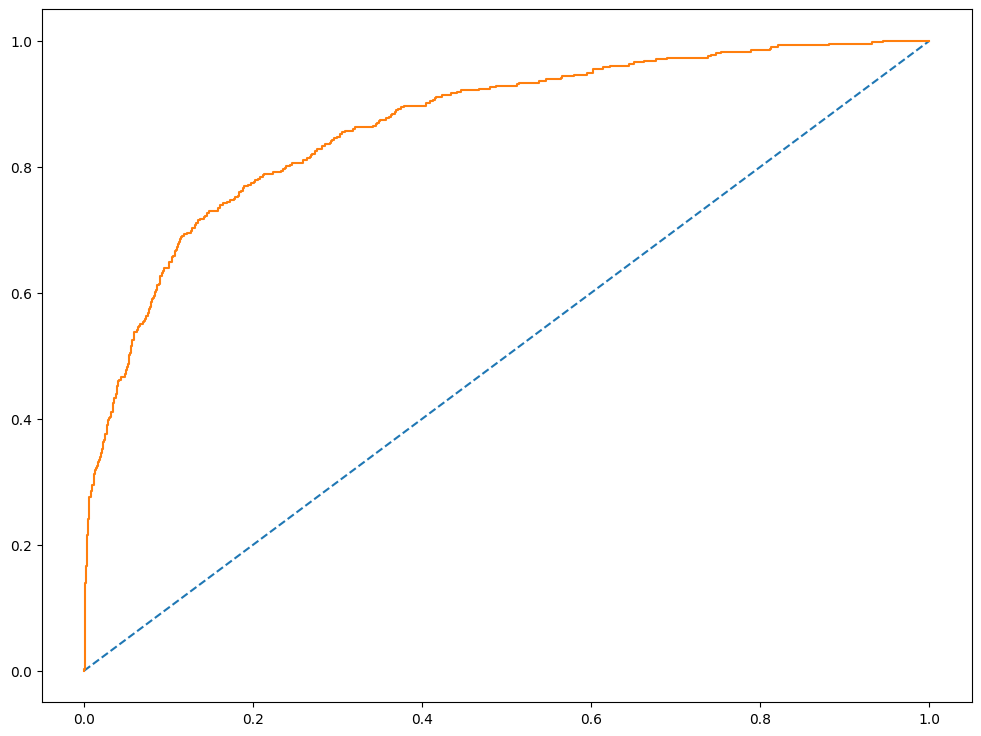

In [58]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

model = RandomForestClassifier(random_state=12345, n_estimators=130,  max_depth=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC RandomForestClassifier - disbalanced',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier - disbalanced')
plt.show()

Вывод:  
2 из 4 моделям удалось достичь F1-меры не менее 0.59 на тестовых данных: модель случайного леса со взвешенными весами классов и модель с увеличенным количеством класса 1.

Видно, что взвешивание классов дает результат лучше для данного набора данных. Percision падает, recall растет, и в целом F-мера имеет небольшой прирост. Баланс классов повышает охват необходимых данных.

Оценивая адеватность модели можно заметить, что AUC-ROC дисбалансной модели и модели с весами примерно одинаково предсказывают вероятность ухода клиента.

В результате исследования была получена модель с лучшими показателями как по F1-мере, так и по AUC-ROC - Случайный лес: взвешенные классы.

Итоговый вывод
При работе с проектом было выполнено:

Изучены данные. Разбиты данные на тренировочную, валидационную и тестовую выборку.
Исследована задача. Проверены модели на данных без изменений.
Скоректирован балланс класса. Изменен вес класса.
Получена улученная модель. Проведен поиск гиперпараметров.
Проведен финальный тест.
Обученная модель случайного леса со взвешенными классами имеет достаточную адекватность, подтвержденная ее значением AUC-ROC = 0.865. Это лучше, чем случайная модель предсказывания (AUC-ROC = 0.5). Точность попадания по классам 0.833, precision 0.569, recall 0.732 и f1 0.632. Модель старается собрать больше данных, чем показать верную точность (recall > precision). Процент попадания в классы достаточно высокий.